The purpose of this notebook is to calculate the Stokes Parameters and demonstrate the polarization in terms of the components of linearly or circularly polarized unit vectors.

First, we import the necessary files:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Theory: From Electric Field to Stokes Parameters
The electric field vector of a wave is given by: <br> <br>
$$ \mathbf{E} = (\mathbf{\hat{x}} E_1 + \mathbf{\hat{y}} E_2)e^{-i \omega t} = \mathbf{E_0} e^{-i \omega t} $$ <br>
The complex amplitudes $ {E_1} $ and $ {E_2} $ can be expressed by: <br> <br>
$$ E_1 = \mathcal{E_1} e^{i \phi_1} $$  $$ E_2 = \mathcal{E_2} e^{i \phi_2} $$ <br>
Taking the real parts, the x and y components are: <br> <br>
$$ E_x = \mathcal{E_1} \cos{(\omega t - \phi_1)} $$  $$ E_y = \mathcal{E_2} \cos{(\omega t - \phi_2)} $$ <br> 
For a general ellipse (with major/minor axes tilted at an angle $\chi$ with respect to the x and y axes), the components become: <br> <br>
$$ E_x = \mathcal{E_0} (\cos{\beta}\cos{\chi}\cos{\omega t} + \sin{\beta}\sin{\chi}\sin{\omega t}) $$  $$ E_y = \mathcal{E_0} (\cos{\beta}\sin{\chi}\cos{\omega t} - \sin{\beta}\cos{\chi}\sin{\omega t}) $$ <br>
In the equations for the different components, $ -\frac{\pi}{2} \leq \beta \leq \frac{\pi}{2} $ . <br> <br>
Comparing the two equations for $ E_x $ and $ E_y $ , we find: <br> <br>
$$ \mathcal{E_1}\cos{\phi_1} = \mathcal{E_0}\cos{\beta}\cos{\chi} $$  $$ \mathcal{E_1}\sin{\phi_1} = \mathcal{E_0}\sin{\beta}\sin{\chi} $$  $$ \mathcal{E_2}\cos{\phi_2} = \mathcal{E_0}\cos{\beta}\sin{\chi} $$  $$ \mathcal{E_2}\sin{\phi_2} = -\mathcal{E_0}\sin{\beta}\cos{\chi} $$ <br>
The Stokes Parameters for monochromatic waves are defined as: <br> <br>
$$ I \equiv \mathcal{E_1}^{2} + \mathcal{E_2}^{2} = \mathcal{E_0}^{2} $$  $$ Q \equiv \mathcal{E_1}^{2} - \mathcal{E_2}^{2} = \mathcal{E_0}^{2}\cos{2 \beta}\cos{2 \chi} $$  $$ U \equiv 2\mathcal{E_1}\mathcal{E_2}\cos{(\phi_1 - \phi_2)} = \mathcal{E_0}^{2}\cos{2 \beta}\sin{2 \chi} $$  $$ V \equiv 2\mathcal{E_1}\mathcal{E_2}\sin{(\phi_1 - \phi_2)} = \mathcal{E_0}^{2}\sin{2 \beta} $$ <br>
So, given $ \mathcal{E_0} $, the tilt angle ($ \chi $), and $ \beta $, it is possible to determine $ \mathcal{E_1} $, $ \phi_1 $, $ \mathcal{E_2} $, $ \phi_2 $ (which are necessary to determine the electric field vector $ \mathbf{E} $), and all of the Stokes Parameters ($ I $, $ Q $, $ U $, $ V $).

# Example:
We want to find the Stokes Parameters and see the polarization in terms of the linearly and circularly polarized unit vectors. First, we must define the necessary parameters: $ \mathcal{E_0} $, $ \chi $, and $ \beta $:

In [2]:
# epsilon naught (to be left at 1 for graphing purposes)
eps_0 = 1.0;

# tilt angle chi (can be between 0 and pi)
# note: to use pi, type np.pi
chi = 0;

# beta (can be between the values -pi/2 and pi/2)
# note: to use pi, type np.pi
beta = .5;

## Stokes Parameters
From $ \mathcal{E_0} $, $ \chi $, and $ \beta$ we can calculate all of the Stokes Parameters ($ I $, $ Q $, $ U $, $ V $):

In [3]:
#Stokes Parameters from the given values

I = eps_0**2;
print ("I = ", end ="");
print (round(I,3));

Q = eps_0**2*np.cos(2*beta)*np.cos(2*chi);
print ("Q = ", end ="");
print (round(Q,3));

U = eps_0**2*np.cos(2*beta)*np.sin(2*chi);
print ("U = ", end ="");
print (round(U,3));

V = eps_0**2*np.sin(2*beta);
print ("V = ", end ="");
print (round(V,3));

I = 1.0
Q = 0.54
U = 0.0
V = 0.841


We can check the Stokes Paramaters using the following relation: $ I^{2} = Q^{2} + U^{2} + V^{2} $:

In [4]:
I_squared = I**2;
print ("I^2 = ", end ="");
print (round(I_squared,3));

check = Q**2 + U**2 + V**2;
print ("Q^2 + U^2 + V^2 = ", end ="")
print (round(check,3));

print ("Indeed, I^2 = Q^2 + U^2 + V^2 since: ", end ="");
print (round(I_squared,3), end="");
print (" = ", end ="");
print (round(check, 3));

I^2 = 1.0
Q^2 + U^2 + V^2 = 1.0
Indeed, I^2 = Q^2 + U^2 + V^2 since: 1.0 = 1.0


## Visualization
The total polarization can be viewed as a combination of two linearly polarized vectors or two circularly polarized vectors. We want to demonstrate this for our given parameters $ \mathcal{E_0} $, $ \chi $, and $ \beta $. <br> <br>
First, we must define the $ x $ and $ y $ components of the Electric field ($ E_x $ and $ E_y$):

In [5]:
# Set omega (this value can be changed as wished, but is set at 1 as a default)
omega = 1;

# Define E_x and E_y equations:

def E_x(t):
    return eps_0*(np.cos(beta)*np.cos(chi)*np.cos(omega*t) + np.sin(beta)*np.sin(chi)*np.sin(omega*t));

def E_y(t):
    return eps_0*(np.cos(beta)*np.sin(chi)*np.cos(omega*t) - np.sin(beta)*np.cos(chi)*np.sin(omega*t));

We can graph $ E_x $ and $ E_y $ on the interval $ 0 \leq t \leq 2\pi $ :

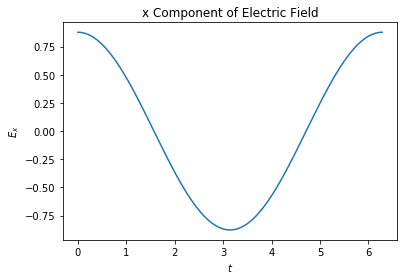

In [6]:
# Graphing E_x:

t = np.linspace(0, 2*np.pi, 1000)
y1 = E_x(t);
plt.plot(t, y1)
plt.xlabel( '$t$' )
plt.ylabel( '$E_x$' )
plt.title( 'x Component of Electric Field' )
plt.show()

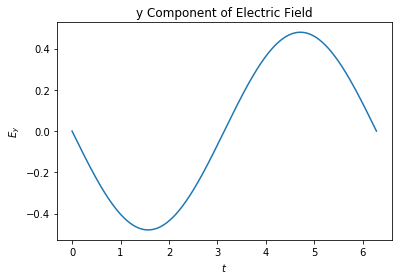

In [7]:
# Graphing E_y:

y2 = E_y(t)
plt.plot(t, y2)
plt.xlabel( '$t$' )
plt.ylabel( '$E_y$' )
plt.title( 'y Component of Electric Field' )
plt.show()

To visualize the polarization, we plot the two field components together:

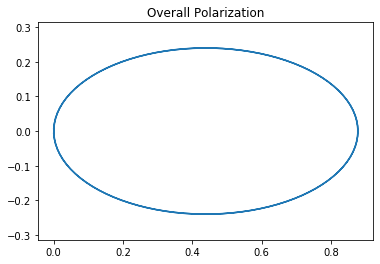

In [8]:
# Overall Polarization

time = np.linspace(0, 2*np.pi, 100)

plt.plot( E_x(time)*np.cos(omega*time) , E_y(time)*np.cos(omega*time) )
plt.axis('equal')
plt.title('Overall Polarization')
plt.show()

### Linear Polarization:

We can observe how the overall polarization is broken down in terms of the linear vectors ($ E_x $ and $ E_y $). In each plot, the blue vector corresponds to $ E_x $, the green vector corresponds to $ E_y $, and the black vector is the total polarization, $ \mathbf{E} $.

Linear Vectors at $ t = 0 $ :

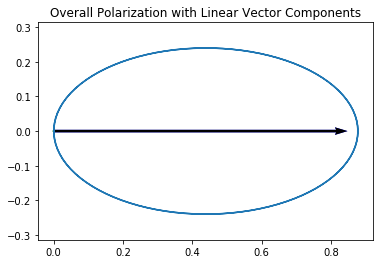

In [9]:
# Overall Polarization at time t = 0:

quiver_time = 0

plt.plot( E_x(time)*np.cos(omega*time) , E_y(time)*np.cos(omega*time) )

plt.quiver([0, 0, 0], [0, 0, 0], [E_x(quiver_time)*np.cos(omega*quiver_time), 0, E_x(quiver_time)*np.cos(omega*quiver_time)],
          [0, E_y(quiver_time)*np.cos(omega*quiver_time), E_y(quiver_time)*np.cos(omega*quiver_time)],
          color=['b','g','k'], scale=1)

plt.axis('equal')
plt.title('Overall Polarization with Linear Vector Components')
plt.show()

Linear Vectors at $ t = \frac{\pi}{4} $ :

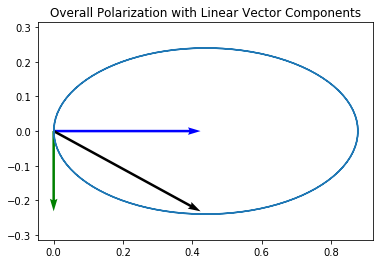

In [10]:
# Overall Polarization at time t = pi/4:

quiver_time = np.pi/4

plt.plot( E_x(time)*np.cos(omega*time) , E_y(time)*np.cos(omega*time) )

plt.quiver([0, 0, 0], [0, 0, 0], [E_x(quiver_time)*np.cos(omega*quiver_time), 0, E_x(quiver_time)*np.cos(omega*quiver_time)],
          [0, E_y(quiver_time)*np.cos(omega*quiver_time), E_y(quiver_time)*np.cos(omega*quiver_time)],
          color=['b','g','k'], scale=1)

plt.axis('equal')
plt.title('Overall Polarization with Linear Vector Components')
plt.show()

Linear Vectors at $ t = \frac{\pi}{2} $ :

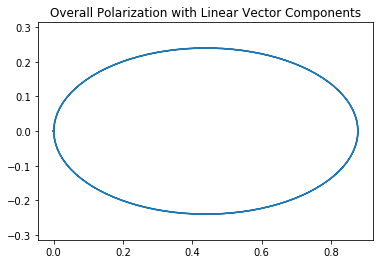

In [11]:
# Overall Polarization at t = pi/2:

quiver_time = np.pi/2

plt.plot( E_x(time)*np.cos(omega*time) , E_y(time)*np.cos(omega*time) )

plt.quiver([0, 0, 0], [0, 0, 0], [E_x(quiver_time)*np.cos(omega*quiver_time), 0, E_x(quiver_time)*np.cos(omega*quiver_time)],
          [0, E_y(quiver_time)*np.cos(omega*quiver_time), E_y(quiver_time)*np.cos(omega*quiver_time)],
          color=['b','g','k'], scale=1)

plt.axis('equal')
plt.title('Overall Polarization with Linear Vector Components')
plt.show()

Linear Vectors at $ t = \frac{3\pi}{4} $ :

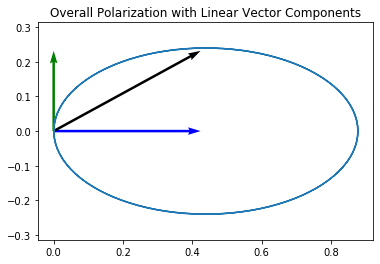

In [12]:
# Overall Polarization at t = 3pi/4:

quiver_time = 3*np.pi/4

plt.plot( E_x(time)*np.cos(omega*time) , E_y(time)*np.cos(omega*time) )

plt.quiver([0, 0, 0], [0, 0, 0], [E_x(quiver_time)*np.cos(omega*quiver_time), 0, E_x(quiver_time)*np.cos(omega*quiver_time)],
          [0, E_y(quiver_time)*np.cos(omega*quiver_time), E_y(quiver_time)*np.cos(omega*quiver_time)],
          color=['b','g','k'], scale=1)

plt.axis('equal')
plt.title('Overall Polarization with Linear Vector Components')
plt.show()

Linear Vectors at $ t = \pi $ :

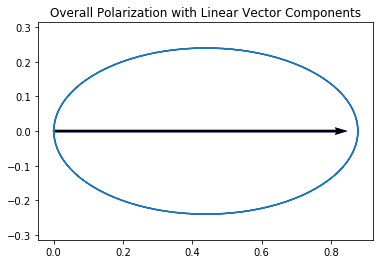

In [13]:
# Overall Polarization at t = pi:

quiver_time = np.pi

plt.plot( E_x(time)*np.cos(omega*time) , E_y(time)*np.cos(omega*time) )

plt.quiver([0, 0, 0], [0, 0, 0], [E_x(quiver_time)*np.cos(omega*quiver_time), 0, E_x(quiver_time)*np.cos(omega*quiver_time)],
          [0, E_y(quiver_time)*np.cos(omega*quiver_time), E_y(quiver_time)*np.cos(omega*quiver_time)],
          color=['b','g','k'], scale=1)

plt.axis('equal')
plt.title('Overall Polarization with Linear Vector Components')
plt.show()

It is possible to see which way the polarization goes (left-handed or right-handed) by observing how the total polarization vector ($ \mathbf{E} $) moves in the above plots. To view the linear polarization vectors ($ E_x $ , $ E_y $, and $ \mathbf{E} $) for a particular time, simply change the value of "quiver_time" in the code below:

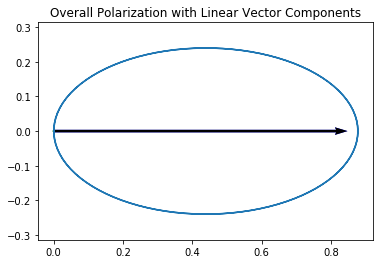

In [14]:
# Overall Polarization for specified time...

# change quiver_time to the desired time to see the polarization vectors:
quiver_time = 0

plt.plot( E_x(time)*np.cos(omega*time) , E_y(time)*np.cos(omega*time) )

plt.quiver([0, 0, 0], [0, 0, 0], [E_x(quiver_time)*np.cos(omega*quiver_time), 0, E_x(quiver_time)*np.cos(omega*quiver_time)],
          [0, E_y(quiver_time)*np.cos(omega*quiver_time), E_y(quiver_time)*np.cos(omega*quiver_time)],
          color=['b','g','k'], scale=1)

plt.axis('equal')
plt.title('Overall Polarization with Linear Vector Components')
plt.show()

### Circular Polarization:

We can observe how the overall polarization is broken down in terms of the circular vectors ($ E_+ $ and $ E_- $). In each plot, the blue vector corresponds to $ E_+ $, the green vector corresponds to $ E_- $, and the black vector is the total polarization, $ \mathbf{E} $.

Circular Vectors at $ t = 0 $ :

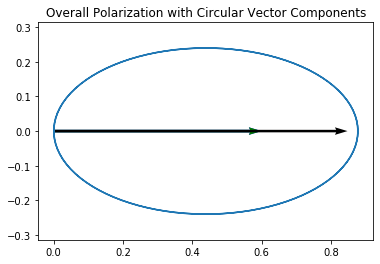

In [15]:
# Overall Polarization at t = 0:

quiver_time = 0

plt.plot( E_x(time)*np.cos(omega*time), E_y(time)*np.cos(omega*time))

plt.quiver([0, 0, 0], [0, 0, 0], [(1/np.sqrt(2))*E_x(quiver_time)*np.cos(omega*quiver_time), (1/np.sqrt(2))*E_x(quiver_time)*np.cos(omega*quiver_time), E_x(quiver_time)*np.cos(omega*quiver_time)], 
           [(1/np.sqrt(2))*E_y(quiver_time)*np.sin(omega*quiver_time), -(1/np.sqrt(2))*E_y(quiver_time)*np.sin(omega*quiver_time), E_y(quiver_time)*np.cos(omega*quiver_time)], 
           color=['b','g','k'], scale=1)

plt.axis('equal')
plt.title('Overall Polarization with Circular Vector Components')
plt.show()

Circular Polarization at $ t = \frac{\pi}{4} $ :

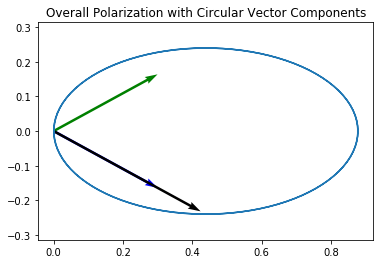

In [16]:
# Overall Polarization at t = pi/4:

quiver_time = np.pi/4

plt.plot( E_x(time)*np.cos(omega*time), E_y(time)*np.cos(omega*time))

plt.quiver([0, 0, 0], [0, 0, 0], [(1/np.sqrt(2))*E_x(quiver_time)*np.cos(omega*quiver_time), (1/np.sqrt(2))*E_x(quiver_time)*np.cos(omega*quiver_time), E_x(quiver_time)*np.cos(omega*quiver_time)], 
           [(1/np.sqrt(2))*E_y(quiver_time)*np.sin(omega*quiver_time), -(1/np.sqrt(2))*E_y(quiver_time)*np.sin(omega*quiver_time), E_y(quiver_time)*np.cos(omega*quiver_time)], 
           color=['b','g','k'], scale=1)

plt.axis('equal')
plt.title('Overall Polarization with Circular Vector Components')
plt.show()

Circular Polarization at $ t = \frac{\pi}{2} $ :

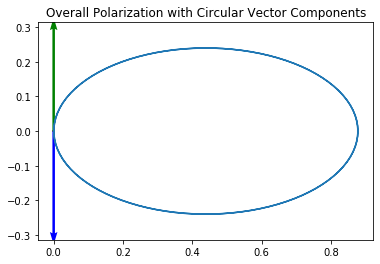

In [17]:
# Overall Polarization at t = pi/2:

quiver_time = np.pi/2

plt.plot( E_x(time)*np.cos(omega*time), E_y(time)*np.cos(omega*time))

plt.quiver([0, 0, 0], [0, 0, 0], [(1/np.sqrt(2))*E_x(quiver_time)*np.cos(omega*quiver_time), (1/np.sqrt(2))*E_x(quiver_time)*np.cos(omega*quiver_time), E_x(quiver_time)*np.cos(omega*quiver_time)], 
           [(1/np.sqrt(2))*E_y(quiver_time)*np.sin(omega*quiver_time), -(1/np.sqrt(2))*E_y(quiver_time)*np.sin(omega*quiver_time), E_y(quiver_time)*np.cos(omega*quiver_time)], 
           color=['b','g','k'], scale=1)

plt.axis('equal')
plt.title('Overall Polarization with Circular Vector Components')
plt.show()

Circular Polarization at $ t = \frac{3\pi}{4} $ :

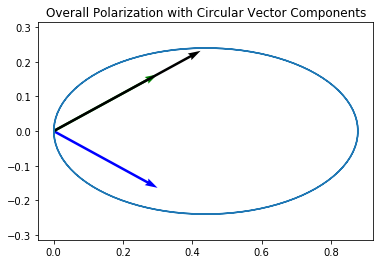

In [18]:
# Overall Polarization at t = 3pi/4:

quiver_time = 3*np.pi/4

plt.plot( E_x(time)*np.cos(omega*time), E_y(time)*np.cos(omega*time))

plt.quiver([0, 0, 0], [0, 0, 0], [(1/np.sqrt(2))*E_x(quiver_time)*np.cos(omega*quiver_time), (1/np.sqrt(2))*E_x(quiver_time)*np.cos(omega*quiver_time), E_x(quiver_time)*np.cos(omega*quiver_time)], 
           [(1/np.sqrt(2))*E_y(quiver_time)*np.sin(omega*quiver_time), -(1/np.sqrt(2))*E_y(quiver_time)*np.sin(omega*quiver_time), E_y(quiver_time)*np.cos(omega*quiver_time)], 
           color=['b','g','k'], scale=1)

plt.axis('equal')
plt.title('Overall Polarization with Circular Vector Components')
plt.show()

Circular Polarization at $ t = \pi $ :

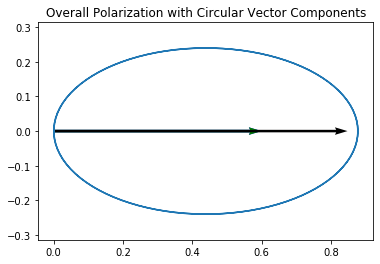

In [19]:
# Overall Polarization at t = pi:

quiver_time = np.pi

plt.plot( E_x(time)*np.cos(omega*time), E_y(time)*np.cos(omega*time))

plt.quiver([0, 0, 0], [0, 0, 0], [(1/np.sqrt(2))*E_x(quiver_time)*np.cos(omega*quiver_time), (1/np.sqrt(2))*E_x(quiver_time)*np.cos(omega*quiver_time), E_x(quiver_time)*np.cos(omega*quiver_time)], 
           [(1/np.sqrt(2))*E_y(quiver_time)*np.sin(omega*quiver_time), -(1/np.sqrt(2))*E_y(quiver_time)*np.sin(omega*quiver_time), E_y(quiver_time)*np.cos(omega*quiver_time)], 
           color=['b','g','k'], scale=1)

plt.axis('equal')
plt.title('Overall Polarization with Circular Vector Components')
plt.show()

To view the linear polarization vectors ($ E_x $ , $ E_y $, and $ \mathbf{E} $) for a particular time, simply change the value of "quiver_time" in the code below:

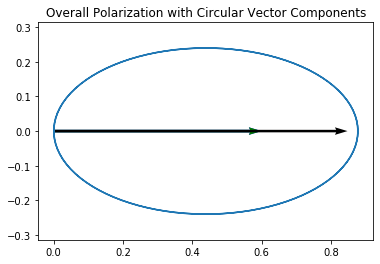

In [20]:
# Overall Polarization at a specified time...

# change quiver_time to the desired time to see the polarization vectors:
quiver_time = 0

plt.plot( E_x(time)*np.cos(omega*time), E_y(time)*np.cos(omega*time))

plt.quiver([0, 0, 0], [0, 0, 0], [(1/np.sqrt(2))*E_x(quiver_time)*np.cos(omega*quiver_time), (1/np.sqrt(2))*E_x(quiver_time)*np.cos(omega*quiver_time), E_x(quiver_time)*np.cos(omega*quiver_time)], 
           [(1/np.sqrt(2))*E_y(quiver_time)*np.sin(omega*quiver_time), -(1/np.sqrt(2))*E_y(quiver_time)*np.sin(omega*quiver_time), E_y(quiver_time)*np.cos(omega*quiver_time)], 
           color=['b','g','k'], scale=1)

plt.axis('equal')
plt.title('Overall Polarization with Circular Vector Components')
plt.show()

Try changing the parameters  $ \chi $ and $ \beta $ to obtain new Stokes Parameters and animations. Special cases to particularly note: <br> <br>
$$ \beta = 0, \frac{\pi}{2}, -\frac{\pi}{2} \Rightarrow \mathbf{Linear\: Polarization} $$ <br>
$$ \beta = \frac{\pi}{4} \Rightarrow \mathbf{Right\!-\!Handed\: Circular\: Polarization} $$ <br>
$$ \beta = -\frac{\pi}{4} \Rightarrow \mathbf{Left\!-\!Handed\: Circular\: Polarization} $$

(Note: $ \mathcal{E_0} $ must remain at 1.0 for graphing purposes.)